In [1]:
import pandas as pd
df = pd.read_csv('results.csv')
df

,Unnamed: 0,Majority Poll,Calibrated Confidence Poll,Calibrated Mul Confidence Poll,Calibrated Max Poll,Max Poll (Uncalibrated)
0,0,0.541748,0.555340,0.619417,0.720388,0.747573
1,1,0.533698,0.548270,0.601093,0.701275,0.759563
2,2,0.558394,0.580292,0.629562,0.740876,0.773723
3,3,0.572491,0.591078,0.641264,0.691450,0.734201
4,4,0.563433,0.591418,0.651119,0.742537,0.770522
5,5,0.541509,0.556604,0.607547,0.724528,0.750943
6,6,0.560976,0.583490,0.630394,0.703565,0.733583
7,7,0.534420,0.539855,0.588768,0.681159,0.731884
8,8,0.532847,0.543796,0.613139,0.722628,0.768248
9,9,0.563327,0.597353,0.663516,0.733459,0.754253


In [2]:
import seaborn as sns


<Axes: ylabel='Count'>

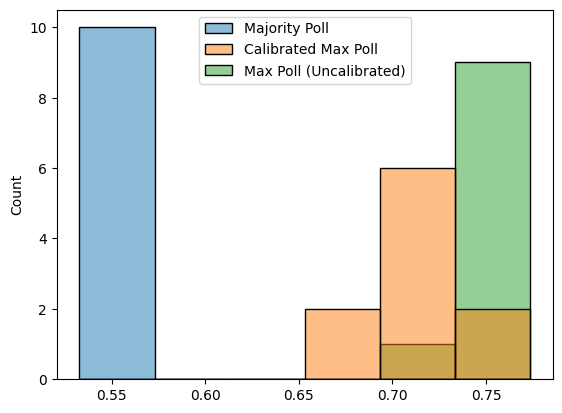

In [7]:
sns.histplot(df[['Majority Poll', 'Calibrated Max Poll', 'Max Poll (Uncalibrated)']])

In [26]:
#######
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_alpha_dict(file_name: str):
    s_vals_paper = []

    df_s_vals = pd.read_csv(file_name)

    s_vals_paper = []
    for index, row in df_s_vals.iterrows():
        s_vals_paper.append(float(row['s_val']))
    s_vals_paper.sort(reverse=True)
    #print(s_vals_paper)
    alphas = np.linspace(0.01, 0.99, 99)
    q_alphas = []
    for alpha in alphas:
        which_quantile = np.ceil((1 - alpha)*(len(s_vals_paper) + 1))/len(s_vals_paper)
        q_alpha = np.quantile(s_vals_paper, which_quantile, method='higher')
        q_alphas.append(q_alpha)
    #print(q_alphas)
    s_vals_paper.sort(reverse=True)
    s_vals_dec = []
    for i in range(9, len(s_vals_paper), 10):
        s_vals_dec.append(s_vals_paper[i])
    #print(s_vals_dec)

    alpha_dict = {}
    for i, alpha in enumerate(alphas):
        alpha_dict[round(alpha, 2)] = q_alphas[i]
    #print(alpha_dict)
    return alpha_dict
    #plt.plot(alphas, q_alphas)

{0.01: 0.7057850360870361, 0.02: 0.6791786849498749, 0.03: 0.6791786849498749, 0.04: 0.6654105484485626, 0.05: 0.6513548195362091, 0.06: 0.6513548195362091, 0.07: 0.6370307803153992, 0.08: 0.6370307803153992, 0.09: 0.6370307803153992, 0.1: 0.6370307803153992, 0.11: 0.6224593222141266, 0.12: 0.6224593222141266, 0.13: 0.6224593222141266, 0.14: 0.6076631247997284, 0.15: 0.6076631247997284, 0.16: 0.6076631247997284, 0.17: 0.5926665663719177, 0.18: 0.5926665663719177, 0.19: 0.5926665663719177, 0.2: 0.5926665663719177, 0.21: 0.5774953663349152, 0.22: 0.5774953663349152, 0.23: 0.5774953663349152, 0.24: 0.5621764659881592, 0.25: 0.5621764659881592, 0.26: 0.5621764659881592, 0.27: 0.5467381775379181, 0.28: 0.5467381775379181, 0.29: 0.5312093496322632, 0.3: 0.5312093496322632, 0.31: 0.5312093496322632, 0.32: 0.5156199038028717, 0.33: 0.5156199038028717, 0.34: 0.5, 0.35: 0.4843800663948059, 0.36: 0.4843800663948059, 0.37: 0.468790590763092, 0.38: 0.468790590763092, 0.39: 0.4532618522644043, 0.4: 

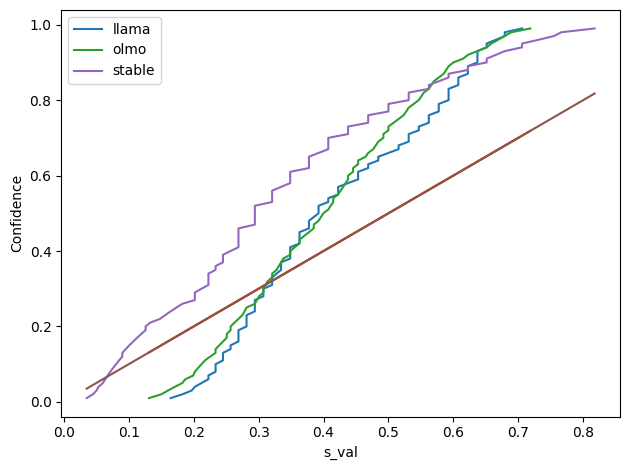

In [60]:
import math
import matplotlib.pyplot as plt
import numpy as np

a_dict_stable = get_alpha_dict('s_values_stable13b_shuffled.csv')
a_dict_olmo = get_alpha_dict('s_values_olmo13b_shuffled.csv')
a_dict_llama = get_alpha_dict('s_values_llama13b_shuffled.csv')

dict_list = [a_dict_llama, a_dict_olmo, a_dict_stable]
names = ['llama', 'olmo', 'stable']
fig, ax1 = plt.subplots(1, 1, sharex=False)
ax1.set_xlabel("s_val")
ax1.set_ylabel("Confidence")

for i, a_dict in enumerate(dict_list):
    ax1.plot(np.array(list(a_dict.values())), 1-np.array(list(a_dict.keys())), label=names[i])
    ax1.plot(np.array(list(a_dict.values())), np.array(list(a_dict.values())))
    ax1.legend()

plt.tight_layout()
print(a_dict_llama)
print(a_dict_olmo)
print(a_dict_stable)

In [49]:
import pandas as pd

df = pd.read_csv('results.csv')

# Filter rows where lowest_s_val_model differs from highest_confidence_model
disagreements = df[df['lowest_s_val_model'] != df['highest_confidence_model']]
disagreements = disagreements[disagreements['lowest_s_val_model_answer'] != disagreements['highest_confidence_model_answer']]

# Print the filtered results
print("Cases where lowest s-value model differs from highest confidence model:")
print(f"Number of disagreements: {len(disagreements)}")
print("\nDetailed disagreements:")
s_val_wins = 0
conf_wins = 0
for _, row in disagreements.iterrows():
    if row['lowest_s_val_model_answer'] == row['is_base_model_correct']:
        s_val_wins += 1
    elif row['highest_confidence_model_answer'] == row['is_base_model_correct']:
        conf_wins += 1
    print(f"Lowest s-val: {row['lowest_s_val_model']} ({row['lowest_s_val_model_answer']}), Highest conf: {row['highest_confidence_model']} ({row['highest_confidence_model_answer']}), Base correct: {row['is_base_model_correct']}")
print(s_val_wins, conf_wins)



Cases where lowest s-value model differs from highest confidence model:
Number of disagreements: 67

Detailed disagreements:
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: False
Lowest s-val: stable (True), Highest conf: olmo (False), Base correct: True
Lowest s-val: llama (False), Highest conf: stable (True), Base correct: True
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: False
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: True
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: True
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: True
Lowest s-val: llama (False), Highest conf: olmo (True), Base correct: True
Lowest s-val: stable (True), Highest conf: olmo (False), Base correct: True
Lowest s-val: stable (True), Highest conf: olmo (False), Base correct: True
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: True
Lowest s-val: stable (True), Hi

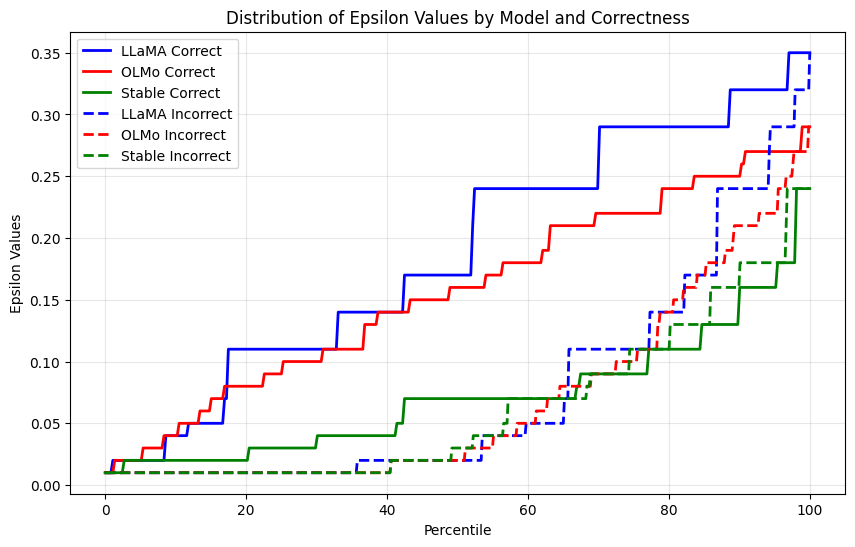

In [72]:
import pandas as pd
from pandas import DataFrame

df_llama = pd.read_csv("s_values_llama13b_test_shuffled.csv")
df_olmo = pd.read_csv("s_values_olmo13b_test_shuffled.csv")
df_stable = pd.read_csv("s_values_stable13b_test_shuffled.csv")

def find_epsilon_from_s(s_value: float, alpha_dict: dict):
    for i in range(1, 100):
        eps = i/100
        if (1 - s_value) <= alpha_dict[eps] and s_value <= alpha_dict[eps] :
            continue
        return eps
    return 1

def separate_cor_incor(df_model: DataFrame):
    correct_rows = df_model[df_model['is_base_model_correct'] == True]
    incorrect_rows = df_model[df_model['is_base_model_correct'] == False]
    return correct_rows, incorrect_rows

df_llama_cors, df_llama_incors = separate_cor_incor(df_llama)
df_olmo_cors, df_olmo_incors = separate_cor_incor(df_olmo)
df_stable_cors, df_stable_incors = separate_cor_incor(df_stable)
llama_cors_conf = [find_epsilon_from_s(row.s_val, a_dict_llama) for _, row in df_llama_cors.iterrows()]
llama_incors_conf = [find_epsilon_from_s(row.s_val, a_dict_llama) for _, row in df_llama_incors.iterrows()]
olmo_cors_conf = [find_epsilon_from_s(row.s_val, a_dict_olmo) for _, row in df_olmo_cors.iterrows()]
olmo_incors_conf = [find_epsilon_from_s(row.s_val, a_dict_olmo) for _, row in df_olmo_incors.iterrows()]
stable_cors_conf = [find_epsilon_from_s(row.s_val, a_dict_stable) for _, row in df_stable_cors.iterrows()]
stable_incors_conf = [find_epsilon_from_s(row.s_val, a_dict_stable) for _, row in df_stable_incors.iterrows()]

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Sort values for smooth lines
llama_cors_conf_sorted = np.sort(llama_cors_conf)
llama_incors_conf_sorted = np.sort(llama_incors_conf)
olmo_cors_conf_sorted = np.sort(olmo_cors_conf)
olmo_incors_conf_sorted = np.sort(olmo_incors_conf)
stable_cors_conf_sorted = np.sort(stable_cors_conf)
stable_incors_conf_sorted = np.sort(stable_incors_conf)

# Create corresponding percentile points
llama_cors_points = np.linspace(0, 100, len(llama_cors_conf_sorted))
llama_incors_points = np.linspace(0, 100, len(llama_incors_conf_sorted))
olmo_cors_points = np.linspace(0, 100, len(olmo_cors_conf_sorted))
olmo_incors_points = np.linspace(0, 100, len(olmo_incors_conf_sorted))
stable_cors_points = np.linspace(0, 100, len(stable_cors_conf_sorted))
stable_incors_points = np.linspace(0, 100, len(stable_incors_conf_sorted))

# Plot lines for correct predictions (solid lines)
plt.plot(llama_cors_points, llama_cors_conf_sorted, color='blue', label='LLaMA Correct', linewidth=2)
plt.plot(olmo_cors_points, olmo_cors_conf_sorted, color='red', label='OLMo Correct', linewidth=2)
plt.plot(stable_cors_points, stable_cors_conf_sorted, color='green', label='Stable Correct', linewidth=2)

# Plot lines for incorrect predictions (dashed lines)
plt.plot(llama_incors_points, llama_incors_conf_sorted, color='blue', label='LLaMA Incorrect', linestyle='--', linewidth=2)
plt.plot(olmo_incors_points, olmo_incors_conf_sorted, color='red', label='OLMo Incorrect', linestyle='--', linewidth=2)
plt.plot(stable_incors_points, stable_incors_conf_sorted, color='green', label='Stable Incorrect', linestyle='--', linewidth=2)

plt.xlabel('Percentile')
plt.ylabel('Epsilon Values')
plt.title('Distribution of Epsilon Values by Model and Correctness')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

